<a href="https://colab.research.google.com/github/Dhanesh10war/DhaneshwarR-Portfolio-Website/blob/main/stock_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3799358217.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end=datetime.datetime.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2015-01-01  189.999802  190.877155  189.090351  189.657431     2963643
2015-01-02  189.496933  191.743813  189.229456  190.042601     7331366
2015-01-05  187.421265  190.641790  187.046782  189.379255    10103941
2015-01-06  178.915237  186.811392  178.037884  186.169433    18627980
2015-01-07  182.809830  183.772776  179.107845  179.129243    20720312


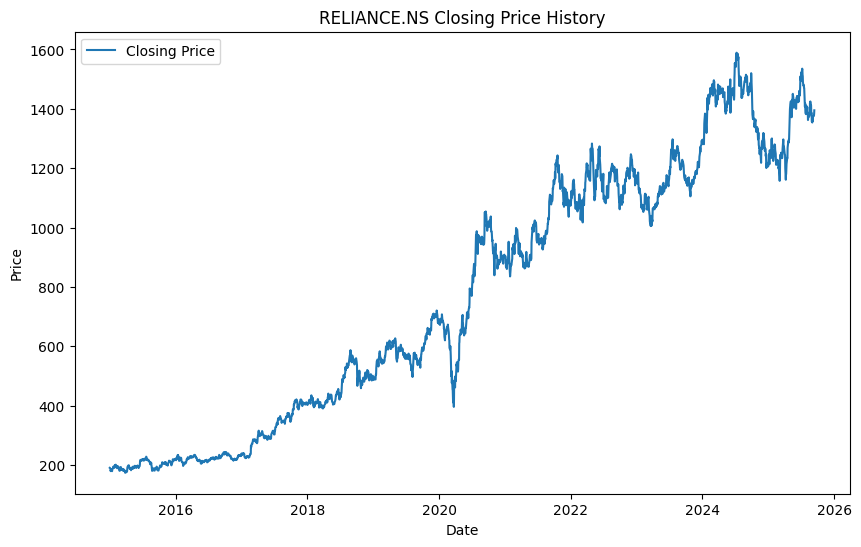

In [1]:
# =========================
# 📌 Day 1 – Setup & Data Collection
# =========================

!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

# Download stock data (example: Reliance)
ticker = "RELIANCE.NS"  # change ticker here
data = yf.download(ticker, start="2015-01-01", end=datetime.datetime.today().strftime('%Y-%m-%d'))

print(data.head())

# Plot closing price
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label="Closing Price")
plt.title(f"{ticker} Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Save for later
data.to_csv("stock_data.csv")


In [7]:
# =========================
# 📌 Day 2 – Preprocessing
# =========================

df = data['Close']
dataset = df.values.reshape(-1, 1)

training_data_len = int(np.ceil(len(dataset) * .8))  # 80% train, 20% test

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
train_data = scaled_data[0:int(training_data_len), :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# =========================
# 📌 Day 3 – Building and Training the LSTM Model
# =========================

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['Accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - Accuracy: 0.0000e+00 - loss: 0.0355
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - Accuracy: 0.0000e+00 - loss: 5.0595e-04
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - Accuracy: 0.0000e+00 - loss: 4.8441e-04
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - Accuracy: 0.0000e+00 - loss: 5.1036e-04
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - Accuracy: 0.0000e+00 - loss: 4.3267e-04
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - Accuracy: 0.0000e+00 - loss: 4.6732e-04
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - Accuracy: 0.0000e+00 - loss: 4.3502e-04
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - Accuracy: 0.0000e+00 - loss: 3.9534e-04
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - Accuracy: 0.0000e+00 - loss: 3.6745e-04
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - Accuracy: 0.0000e+00 - loss: 3.9535e-04
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - Accuracy: 0.0000e+00 - loss: 3

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RMSE: 29.09781663332695


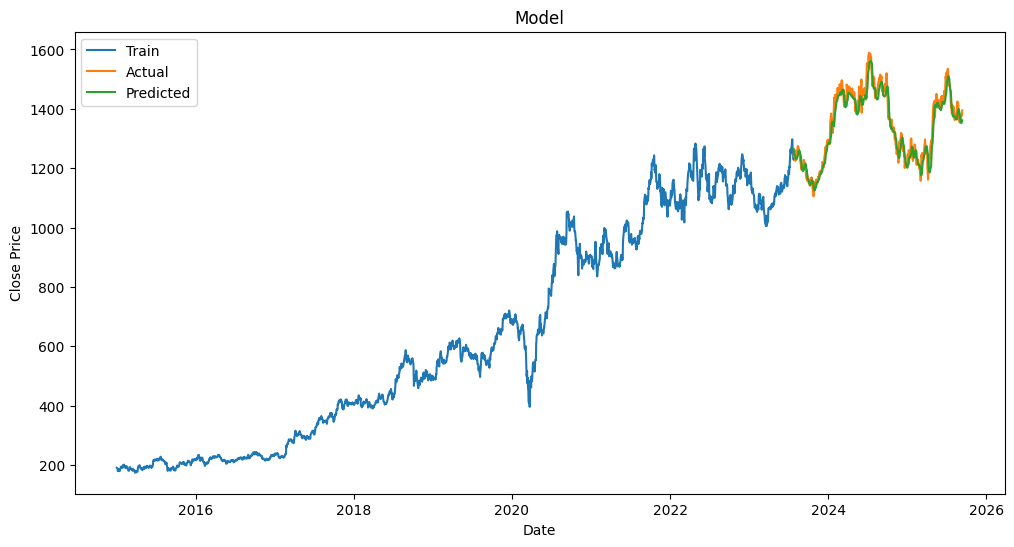

In [14]:
# =========================
# 📌 Day 4 – Model Evaluation
# =========================

test_data = scaled_data[training_data_len-60:, :]
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("RMSE:", rmse)

# Plot results
train = df[:training_data_len]
valid = df[training_data_len:].copy() # Create a copy to avoid SettingWithCopyWarning
valid['Predictions'] = predictions

# Simplify column index for plotting
valid.columns = ['Close', 'Predictions']


plt.figure(figsize=(12,6))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train, label="Train")
plt.plot(valid['Close'], label="Actual")
plt.plot(valid['Predictions'], label="Predicted")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

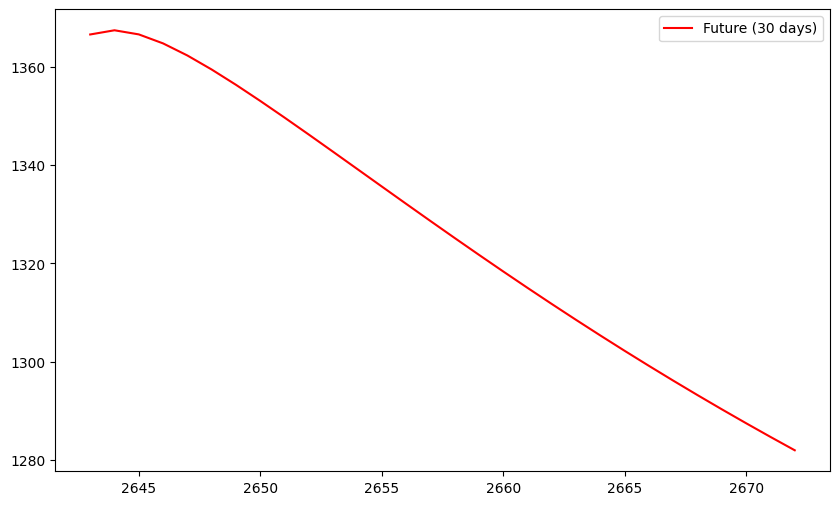

In [21]:
# =========================
# 📌 Day 5 – Future Prediction (Next 30 Days)
# =========================

last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, 60, 1)

future_predictions = []
current_input = last_60_days.copy()

for _ in range(30):  # next 30 days
    pred = model.predict(current_input.reshape(1,60,1))
    future_predictions.append(pred[0,0])
    current_input = np.append(current_input[1:], pred).reshape(60,1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

plt.figure(figsize=(10,6))

# Check if 'Close' column exists and is not empty before plotting
if 'Close' in df.columns and not df['Close'].empty:
    plt.plot(df.index, df['Close'].values, label="History")
else:
    print("Could not retrieve 'Close' column data for plotting history.")

plt.plot(np.arange(len(df), len(df)+30), future_predictions, label="Future (30 days)", color="red")
plt.legend()
plt.show()

In [22]:
# =========================
# 📌 Day 6 – Save Model for Deployment
# =========================

model.save("stock_lstm.h5")


In [23]:
# =========================
# 📌 Day 7 – Streamlit App Prep
# =========================

%%writefile app.py
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import datetime

st.title("📊 Stock Price Prediction App")

ticker = st.text_input("Enter Stock Ticker (e.g. RELIANCE.NS, AAPL, TSLA):", "RELIANCE.NS")

if st.button("Predict"):
    data = yf.download(ticker, start="2015-01-01", end=datetime.datetime.today().strftime('%Y-%m-%d'))
    df = data.filter(['Close'])
    dataset = df.values

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    # Load pre-trained model
    model = load_model("stock_lstm.h5")

    # Prepare test data
    last_60_days = scaled_data[-60:]
    X_future = last_60_days.reshape(1, 60, 1)

    future_predictions = []
    current_input = last_60_days.copy()

    for _ in range(30):
        pred = model.predict(current_input.reshape(1,60,1))
        future_predictions.append(pred[0,0])
        current_input = np.append(current_input[1:], pred).reshape(60,1)

    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

    st.line_chart(df['Close'])
    st.line_chart(pd.DataFrame(future_predictions, columns=['Future Prediction']))


Writing app.py
